# Hill climbing

**Motivatie**:
- bij sommige problemen willen we enkel zoeken naar de **final state**, niet het pad er naartoe.
- bijv. in sudoku, gegeven een complete sudoku, kunnen we altijd incomplete sudoku borden deriveren.
- pad is niet interessant want die kunnen we triviaal opbouwen vanuit de final state
- de **kwaliteit** van de final state is wel interessant (utility/fitness)   

In [26]:
import random

def random_solution(tsp):
    cities = list(range(len(tsp)))
    solution = []

    for _ in range(len(tsp)):
        random_city = cities[random.randint(0, len(cities) - 1)]
        solution.append(random_city)
        cities.remove(random_city)

    return solution

def route_length(tsp, solution):
    route_length = 0
    for i in range(len(solution)):
        route_length += tsp[solution[i - 1]][solution[i]]
    return route_length

def get_neighbours(solution, debug=False):
    neighbours = []
    for i in range(len(solution)):
        if debug: print(f'iter: {i+1}, current val: {solution[i]}') 
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
            if debug:
                print(f'\tswap {solution[i]} for {solution[j]}')
                print(f'{neighbour=}')
        if debug: print()
    return neighbours

def get_best_neighbour(tsp, neighbours, debug=False):
    best_route_length = float('inf')
    best_neighbour = None
    for neighbour in neighbours:
        current_route_length = route_length(tsp, neighbour)
        if debug: print(f'{current_route_length=}\t{best_route_length=}\t{best_neighbour=}')
        if current_route_length < best_route_length:
            best_route_length = current_route_length
            best_neighbour = neighbour
    return best_neighbour, best_route_length

def hill_climbing(tsp, debug=False):

    current_solution = random_solution(tsp)
    current_route_length = route_length(tsp, current_solution)
    neighbours = get_neighbours(current_solution)
    best_neighbour, best_neighbour_route_length = get_best_neighbour(tsp, neighbours)
        
    while best_neighbour_route_length < current_route_length:
        if debug: print(f'{current_route_length=}\t{best_neighbour_route_length=}\t{best_neighbour=}')
    
        current_solution = best_neighbour
        current_route_length = best_neighbour_route_length

        # try again
        neighbours = get_neighbours(current_solution)
        best_neighbour, best_neighbour_route_length = get_best_neighbour(tsp, neighbours)

    return current_solution, current_route_length

def problem_generator(n_cities):
    tsp = []
    for i in range(n_cities):
        distances = []
        for j in range(n_cities):
            if j == i:
                distances.append(0)
            elif j < i:
                distances.append(tsp[j][i])
            else:
                distances.append(random.randint(10, 1000))
        tsp.append(distances)
    return tsp

In [27]:
tsp = [
    [0, 400, 500, 300],
    [400, 0, 300, 500],
    [500, 300, 0, 400],
    [300, 500, 400, 0]
]

sol = random_solution(tsp)
sol

[2, 3, 1, 0]

In [28]:
get_neighbours(sol, True)

iter: 1, current val: 2
	swap 2 for 3
neighbour=[3, 2, 1, 0]
	swap 2 for 1
neighbour=[1, 3, 2, 0]
	swap 2 for 0
neighbour=[0, 3, 1, 2]

iter: 2, current val: 3
	swap 3 for 1
neighbour=[2, 1, 3, 0]
	swap 3 for 0
neighbour=[2, 0, 1, 3]

iter: 3, current val: 1
	swap 1 for 0
neighbour=[2, 3, 0, 1]

iter: 4, current val: 0



[[3, 2, 1, 0],
 [1, 3, 2, 0],
 [0, 3, 1, 2],
 [2, 1, 3, 0],
 [2, 0, 1, 3],
 [2, 3, 0, 1]]

In [29]:
hill_climbing(tsp, True)

current_route_length=1600	best_neighbour_route_length=1400	best_neighbour=[1, 2, 3, 0]


([1, 2, 3, 0], 1400)

In [30]:
tsp2 = problem_generator(20)

In [31]:
hill_climbing(tsp2, False)

([9, 17, 13, 11, 15, 4, 3, 14, 1, 10, 6, 12, 18, 2, 5, 0, 7, 19, 16, 8], 2864)

In [32]:
tsp3 = [
    [0, 100, 10, 1000, 100],
    [100, 0, 100, 10, 10],
    [10, 100, 0, 100, 10],
    [1000, 10, 100, 0, 100],
    [100, 10, 10, 100, 0]
]

hill_climbing(tsp3, True)

current_route_length=500	best_neighbour_route_length=320	best_neighbour=[1, 2, 0, 4, 3]
current_route_length=320	best_neighbour_route_length=230	best_neighbour=[4, 2, 0, 1, 3]


([4, 2, 0, 1, 3], 230)

## Hill climbing varianten

- **First-choice** hill climbing
- **Steepest ascent** hill climbing
- **Stochastic** hill climbing

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def steepest_ascent_step(current, y):
    if y[current-1] > y[current]:
        return current-1
    elif y[current+1] > y[current]: 
        return current+1 
    else:
        return current

def first_choice_step(current, y):
    neighbours = [current-1, current+1]
    np.random.shuffle(neighbours)
    # in dit geval is dit hetzelfde als steepest ascent
    for n in neighbours:
        if y[n] > y[current]: return n
    return current

def stochastic_step(current, y):
    neighbours = [current-1, current+1]
    prob_distr = y[neighbours] / y[neighbours].sum()
    return np.random.choice(neighbours, 1, p=prob_distr)[0]

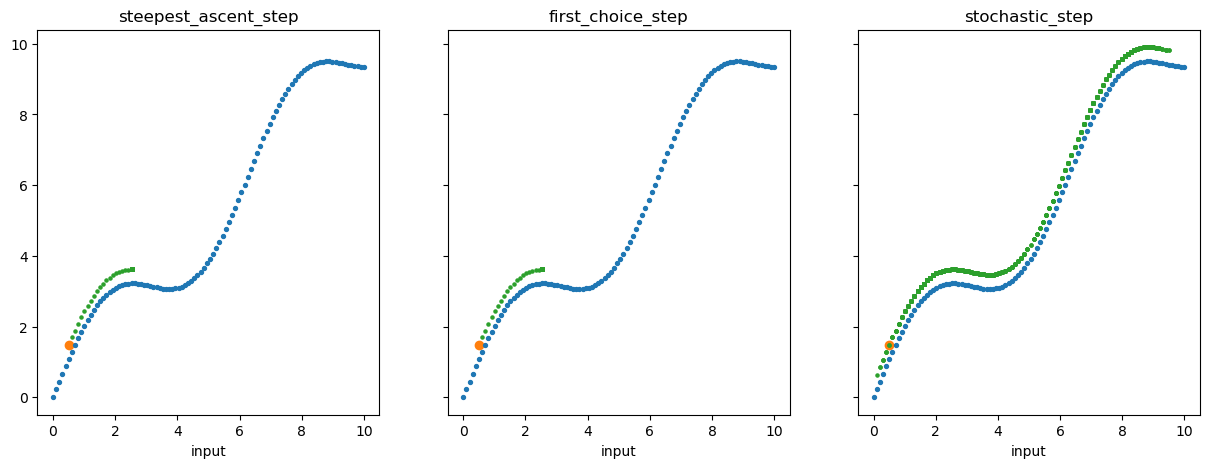

In [35]:
def f(x):
    return x+np.sin(x)*1.2

hill_climbing_variants = [steepest_ascent_step, first_choice_step, stochastic_step]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

x = np.linspace(0, 10, 100)
y = f(x)

start_idx = 5
num_iters = 5000

for ax, optim in zip(axes, hill_climbing_variants):
    path = []
    current = start_idx
    for _ in range(num_iters):
        if current < 0 or current > 99: break
        current = optim(current, y)
        path.append(current)

    ax.scatter(x[start_idx], y[start_idx]+.4, c='C1')
    ax.scatter(x[path], y[path]+.4, s=5, c='C2')
    ax.scatter(x, y, s=8, c='C0')
    ax.set_title(f"{optim.__name__}")
    ax.set_xlabel('input')
    ax.set_xlabel('input')

## Kleine intermezzo

Onderwerpen die we hebben besproken:

### Discrete vs Continuous

- Discreet: telbaar, bijv. de natuurlijke getallen $\mathbb{N}$ is een oneindige verzameling die telbaar is.
    - $0, 1, 2, 3, 4, 5, \dots$
- Continue: niet telbaar, bijv. de reele getallen $\mathbb{R}$ is een oneindige verzameling die we niet sequentieel kunnen tellen
    - $\dots, 0, 0.00000\dots, 0.00000\dots, \dots$

### Van hill climbing (discreet) naar gradient descent (continue)

- Gegeven een set aan inputs (of states) $x_1, x_2, \dots, x_N$ die we gebruiken in de objective function $f(x_1, x_2, \dots, x_N)$.
- In meer dimensies ($N$ in dit geval) is het niet meer tractable om alle mogelijke buren van de inputs (of states) te bekijken. 
- In dat geval kunnen we de richtingscoefficent van de functie $f$ gebruiken die ons informatie geeft over de richting van de steilste beklimming (steepest ascent).
- In het geval de functie constant is: $y = c$ is de richtingscoefficient 0
- In het geval de functie linear is: $y = ax + b$ is de richtingscoefficient $a$
- In alle andere gevallen zullen we moeten differentieren om met de richtingscoefficient een stapje omhoog of omlaag te maken. 

Hoe weet je dat we met steepest ascent altijd een globaal optimum zullen bereiken?

- gegeven de grafiek voor $y = -x^2$, voor alle paren van 2 willekeurige punten op de lijn, trek een nieuwe lijn tussen deze 2 punten. Als iedere mogelijke lijn onder de $y$ curve valt, dan zal er gegarandeerd een globaal maximum gevonden worden. De functie heet dan **convex**
- Als de lijn tussen 2 willekeurige punten altijd boven de curve valt, dan zal er gegarandeerd een globaal minimum gevonden worden. De functie heet dan **concave** 

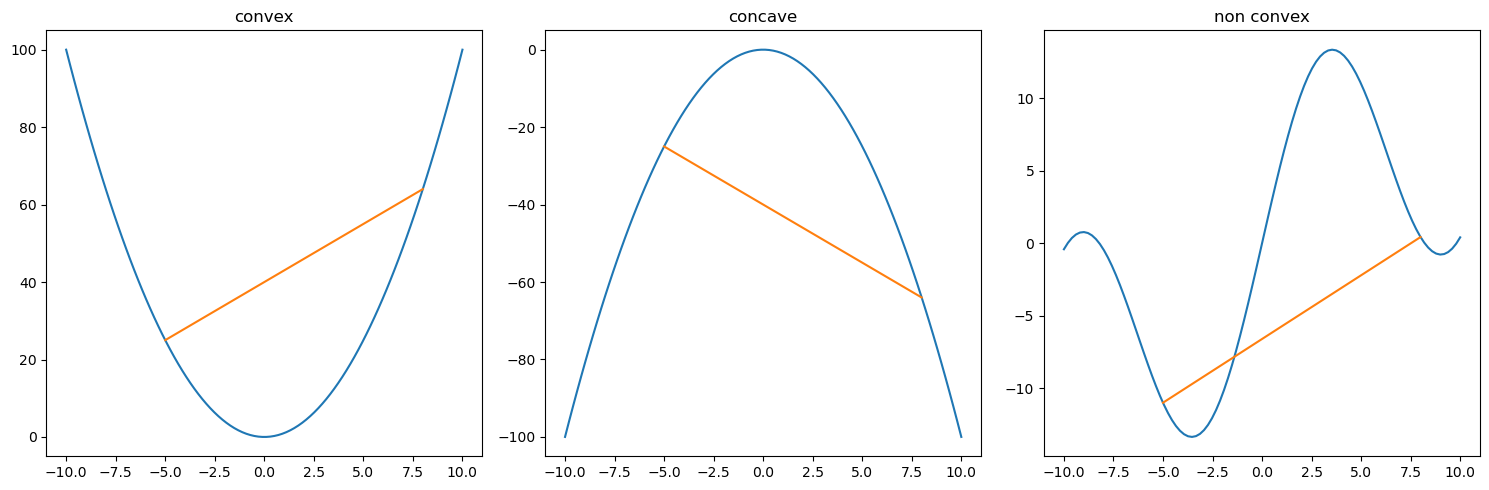

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

convex = lambda x: x**2
concave = lambda x: -x**2
non_convex = lambda x: x+np.sin(x*.5)*10

funcs = [(convex, "convex"), (concave, 'concave'), (non_convex, "non convex")]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

xs = np.array([-5, 8])

for ax, (f, name) in zip(axes, funcs):

    ax.plot(x, f(x))
    ax.set_title(name)
    ax.plot(xs, f(xs))

plt.tight_layout()

# Genetic Algorithm

In [37]:
TARGET = 'Articifial Intelligence'

def compute_fitness(value, target):
    fitness = 0
    for val, tgt in zip(value, target):
        fitness += val == tgt # booleans in python zijn gewoon ints
    return fitness

compute_fitness('    cif hello world', TARGET)

3

In [38]:
class Agent:
    def __init__(self, value) -> None:
        self.value = value # huidige string waarde van de agent

class Population:
    GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
                QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

    def __init__(self, n_pop: int, max_len: int) -> None:
        self.n_pop = n_pop
        self.max_len = max_len
        self.agents = []

    def populate(self):
        self.agents = [Agent(self.random_string()) for _ in range(self.n_pop)]

    def random_string(self):
        # sample uit de GENES pool en concat
        return ''.join(random.choice(self.GENES) for _ in range(self.max_len))
    
    def evaluate(self, target):
        # evalueer agents
        fitness_scores = [compute_fitness(a.value, target) for a in self.agents]
        # sorteer agents op fitness score
        sorted_agents = sorted(zip(fitness_scores, self.agents), reverse=True, key=lambda x: x[0])
        # return de beste agent en agent list
        return [a for _, a in sorted_agents], sorted_agents[0]
    
    def cross_over(self, parents, mutation_rate=0.1):
        # dit wordt de volgende generatie
        new_population = Population(self.n_pop, self.max_len)

        for _ in range(new_population.n_pop):          
            # voor n parents zijn er n-1 cutoffs  
            cutoffs = np.random.choice(self.max_len, len(parents)-1, replace=False).tolist()
            # om te indexeren hebben we een begin en eind index nodig (0 en max_len)
            cutoffs = sorted(list(set([0] + cutoffs + [self.max_len])))
            # neem partities van alle parents en join de substrings
            value = ''.join([p.value[i:j] for i, j, p in zip(cutoffs, cutoffs[1:], parents)])

            # kleine zorgen ervoor dat we uit lokale optima komen
            if random.random() < mutation_rate:
                list_value = list(value)
                idx = random.randint(0, self.max_len-1)
                list_value[idx] = random.choice(self.GENES)
                value = ''.join(list_value)
            
            new_population.agents.append(Agent(value))
        
        return new_population

p = Population(10, 5)
p.populate()
[a.value for a in p.agents]

[',M0fi',
 'P%HO3',
 'j]1Lo',
 'fFGN ',
 'zY@9Q',
 'ovEP?',
 '"%56X',
 'RNnE ',
 ')s I ',
 '9[0 X']

In [39]:
num_parents = 2
mutation_rate = 0.05
population = Population(n_pop=200, max_len=len(TARGET))
population.populate()

for i in range(1000):
    sorted_agents, best_fitness = population.evaluate(TARGET)
    print(f'iter: {i}, best fitness: {best_fitness[0]}, value: "{sorted_agents[0].value}"')
    parents = sorted_agents[:num_parents]
    new_population = population.cross_over(parents, mutation_rate)
    population = new_population
    if sorted_agents[0].value == TARGET: break
    

iter: 0, best fitness: 3, value: "=F jcg Xafe g:?lpfOFD5A"
iter: 1, best fitness: 4, value: "=F jcg Xafe g:?lp#g 8?-"
iter: 2, best fitness: 5, value: "=F jcg Xafe g:?lpfg n?-"
iter: 3, best fitness: 5, value: "=F jcg Xafe g:?lpfg n?-"
iter: 4, best fitness: 5, value: "=F jcg Xafe g:?lpfg n?-"
iter: 5, best fitness: 5, value: "=F jcg Xafe g:?lpfg n?-"
iter: 6, best fitness: 6, value: "=F jcg Xaf  g:?lpfg n?-"
iter: 7, best fitness: 6, value: "=F jcg Xaf  g:?lpfg n?-"
iter: 8, best fitness: 6, value: "=F jcg Xaf  g:?lpfg n?-"
iter: 9, best fitness: 6, value: "=F jcg Xaf  g:?lpfg n?-"
iter: 10, best fitness: 7, value: "=F jcg Xaf  g:?llfg n?-"
iter: 11, best fitness: 7, value: "=F jcg Xaf  g:?llfg n?-"
iter: 12, best fitness: 7, value: "=F jcg Xaf  g:?llfg n?-"
iter: 13, best fitness: 7, value: "=F jcg Xaf  g:?llfg n?-"
iter: 14, best fitness: 7, value: "=F jcg Xaf  g:?llfg n?-"
iter: 15, best fitness: 7, value: "=F jcg Xaf  g:?llfg n?-"
iter: 16, best fitness: 7, value: "=F jcg Xaf  g:?